## Introduction

This notebook is dedicated for exploratory data analysis of the [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset). The goal is to find out useful insights for further development of the prediction models.

## Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import functions as f
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

## Importing data

In [2]:
df = pd.read_csv("data/healthcare-stroke-data.csv")

## Overview of the dataset

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
print(f"Rows: {df.shape[0]} \nColumns: {df.shape[1]}")

Rows: 5110 
Columns: 12


In [5]:
df.rename(columns={"Residence_type": "residence_type"}, inplace=True)

In [6]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
print(f"MISSING VALUE COUNTS \n{df.isnull().sum()}")

MISSING VALUE COUNTS 
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [8]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
cols = [
    "gender",
    "hypertension",
    "heart_disease",
    "ever_married",
    "work_type",
    "residence_type",
    "smoking_status",
    "stroke",
]
print("UNIQUE VALUES OF CATEGORICAL FEATURES")
for col in df[cols]:
    print(col, df[col].unique())

UNIQUE VALUES OF CATEGORICAL FEATURES
gender ['Male' 'Female' 'Other']
hypertension [0 1]
heart_disease [1 0]
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke [1 0]


In [10]:
print("DESCRIBTIVE STATISTICS OF NUMERICAL FEATURES")
df[["age", "avg_glucose_level", "bmi"]].describe()

DESCRIBTIVE STATISTICS OF NUMERICAL FEATURES


,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [11]:
print(f"TOTAL NUMBER OF DUPLICATED ROWS: {df.duplicated().sum()}")

TOTAL NUMBER OF DUPLICATED ROWS: 0


## Split the Data into Train and Test Sets

I am spliting the data into train and test set in this early stage to avoid data snooping bias. Also I am exporting those sets to csv files to use them in the classification notebook.

In [12]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
#train_set.to_csv("train_set.csv", index=False)
#test_set.to_csv("test_set.csv", index=False)
stroke = train_set.copy()

## EDA

In [13]:
# renaming categorical values for better representation in plots
stroke["hypertension"] = stroke["hypertension"].replace({0: "Don't have", 1: "Have"})
stroke["heart_disease"] = stroke["heart_disease"].replace({0: "Don't have", 1: "Have"})
stroke["work_type"] = stroke["work_type"].replace({"Govt_job": "Gov-Job", "Never_worked": "Never worked", "children": "Under 16 years old"})
stroke["smoking_status"] = stroke["smoking_status"].replace({"Unknown": "Unknown", "never smoked": "Never smoked", "formerly smoked": "Former smoker", "smokes": "Smokes"})
stroke["stroke"] = stroke["stroke"].replace({0: "Healthy", 1: "Had a stroke"})

First of all I will look at the distributions of the numerical features.

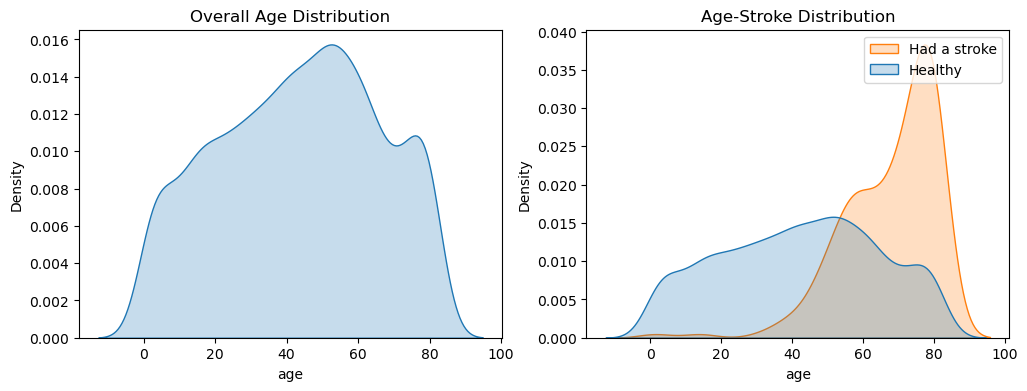

In [14]:
f.distribution_plot(stroke, col="age")

Overall the age seems to be normally distributed. But if we look at the age distributions of people who had a stroke and who didn't, we can see that the age distribution of people who had a stroke is shifted to the right. This means that the people who had a stroke are older than the people who didn't have a stroke. This is a good sign that the age feature could be potentially a good predictor for the risk of stroke prediction.

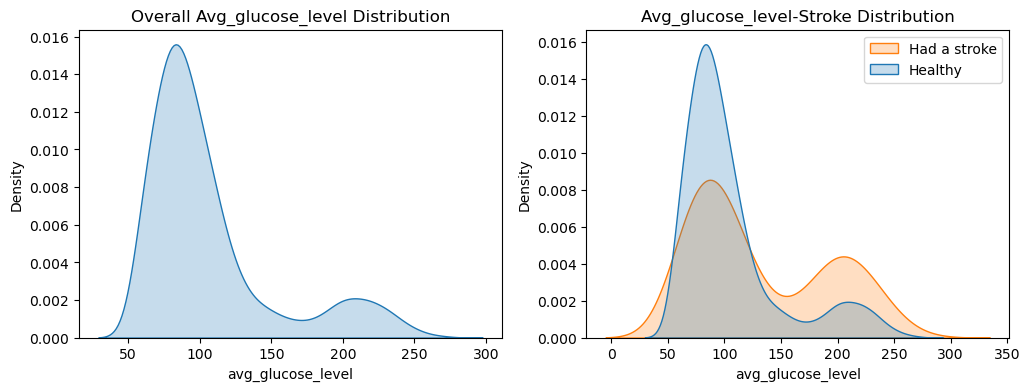

In [15]:
f.distribution_plot(stroke, col="avg_glucose_level")

Looking at the distribution of the average glucose level, we can see that it has two peaks and is shifted to the left. After looking at the distributions of the the groups of people who didn't have and who did have a stroke, we can see the same tendency. But the thing the we need to point out is that the people who didn't have a stroke tend to have a lower average glucose level than the people who did have a stroke. This means that this feature also could be an important predictor for the risk of stroke prediction.

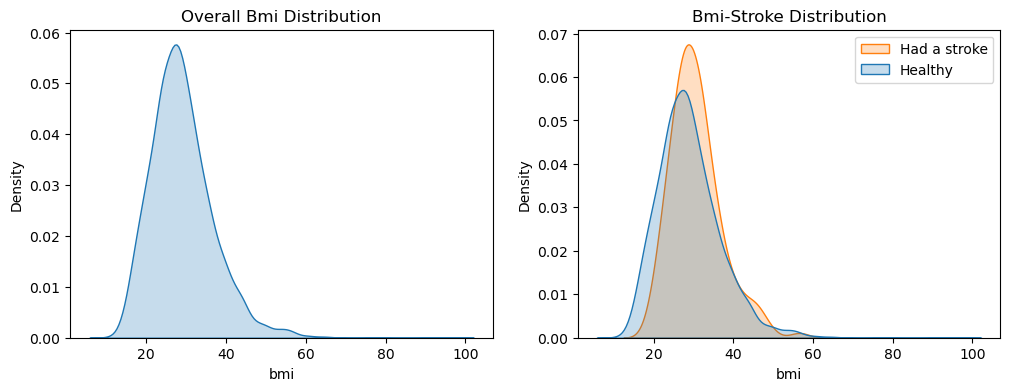

In [16]:
f.distribution_plot(stroke, col="bmi")

The last numerical feature is body mass index (bmi). The distribution of this feature is also shifted to the left. And after looking at the individual distributions of the people who had a stroke and who did't we can see that there is no apparent difference in those distributions. So it is hard to say if this feature would be useful in the prediction model.

---

After numerical feature exploration let's look at our target feature - stroke.

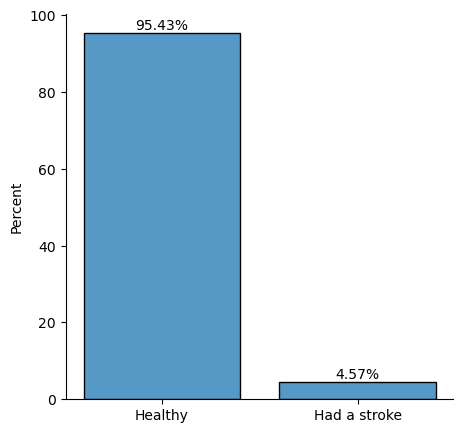

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=stroke, x="stroke", stat="percent", discrete=True, shrink=.8, ax=ax)
ax.set_xticks([0, 1])
ax.set_xlabel("")
sns.despine()
for label in ax.containers:
    ax.bar_label(label, fmt="%.2f%%")

From this plot we can see that our dataset is extremely imbalanced. Only 4.5% of people are those who had a stroke. This means that the most primitive model would predict with 95.5% accuracy. So we need have that in mind when developing the prediction model. And also think about the way to deal with this imbalance.

---

Now let's move on the categorical features.

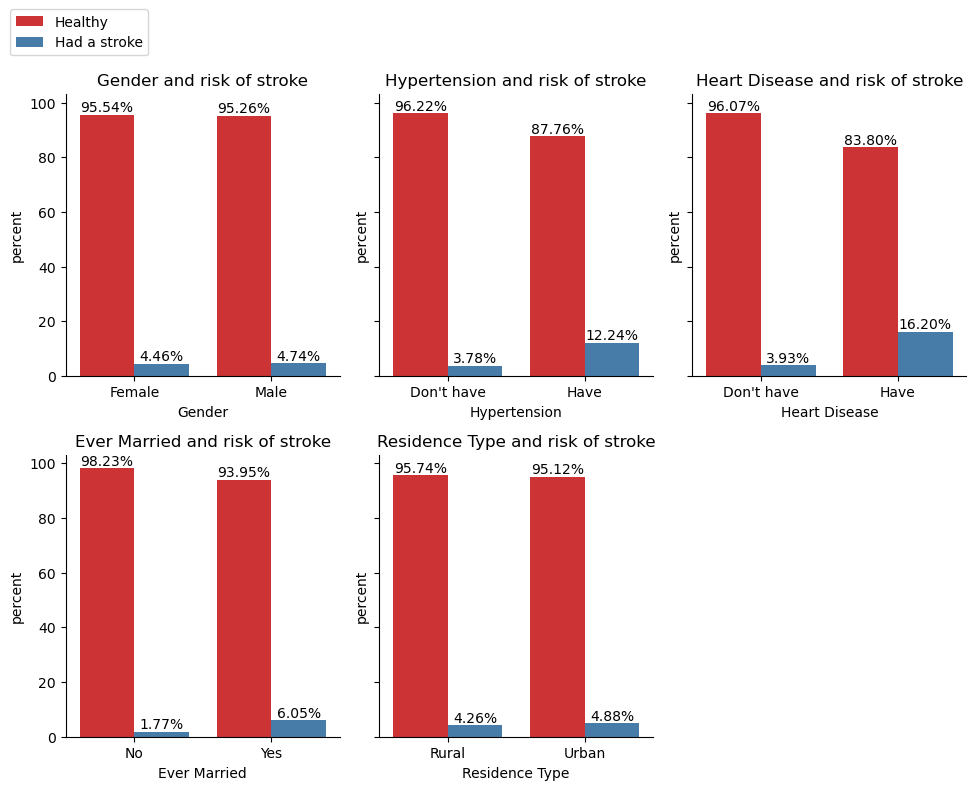

In [18]:
cols = [
    "gender",
    "hypertension",
    "heart_disease",
    "ever_married",
    "residence_type",
]
hue = "stroke"
palette = sns.color_palette("Set1", 2)
f.normalized_barplots(
    stroke,
    cols,
    hue,
    grid_x=3,
    grid_y=2,
    palette=palette,
    figsize=(10, 8),
    legend_loc=(0.3, 1.3),
)

From this plot we can see 5 categorical features with the distributions of people who had a stroke and those who didn't between the different categories of each feature. From these plot we can make the following observations:
- The hypertention feature seems to have a relation to the risk of stroke. There is a higher percentage of people who had a stroke in the group of people who have hypertension.
- Heart disease also seems to have a relation to the risk of stroke. There is a higher percentage of people who had a stroke in the group of people who have heart disease.
- The ever married feature also seems to have a relation to the risk of stroke. There is a higher percentage of people who had a stroke in the group of people who are married. But this tendency could be associated to the fact that the people who are married or have been married also tend to be older and as we so earlier the older people have a higher risk of stroke.

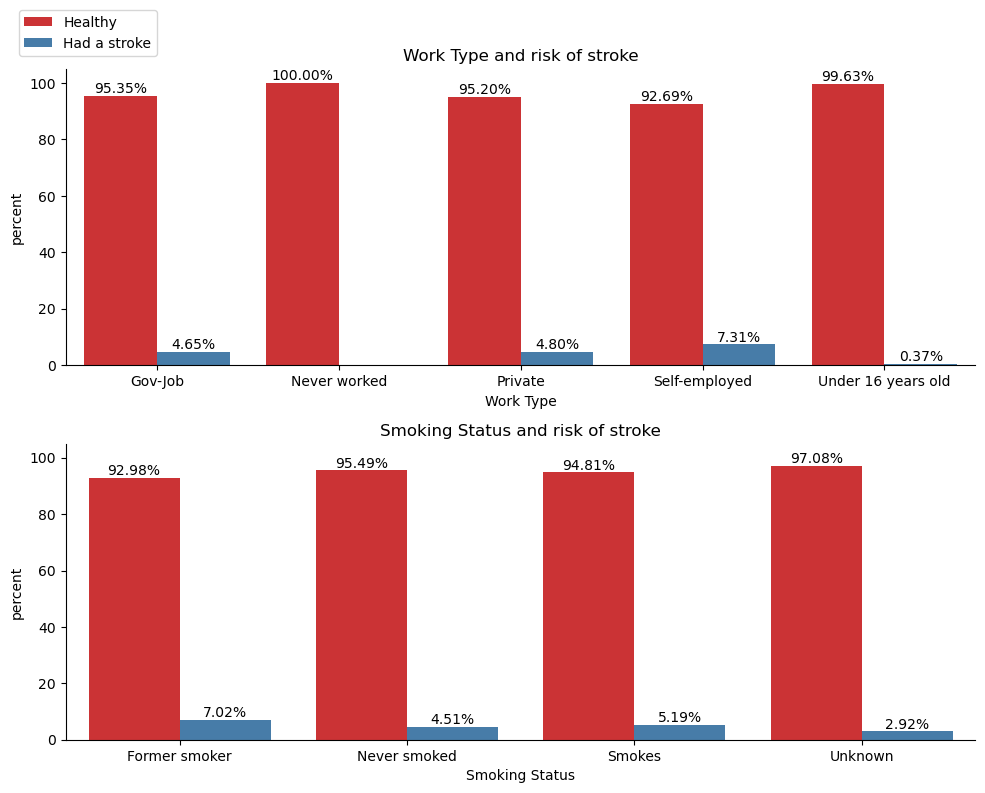

In [19]:
cols = ["work_type", "smoking_status"]
hue = "stroke"
f.normalized_barplots(
    stroke,
    cols,
    hue,
    grid_x=1,
    grid_y=2,
    palette=palette,
    figsize=(10, 8),
    legend_loc=(0.1, 1.2),
)

From this plot we can see 2 categorical features with more then 2 categories and their distributions of people who had a stroke and those who didn't. From these plot we can make the following observations:  
- The people who are self-employed tend to have a higher risk of stroke comparing to the people who work in the private sector or are government employees.
- The smoking status seems to have no relation to the risk of having a stroke. Although medical studies say otherwise.  

---

Now let's look at the correlation between the numerical features as well as with the target feature.

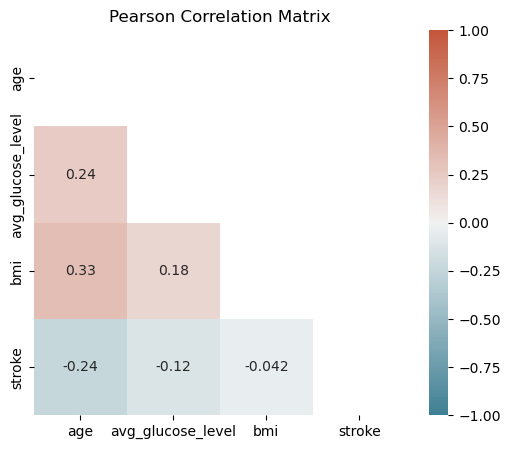

In [20]:
stroke["stroke"] = stroke["stroke"].astype("category").cat.codes
f.corr_heatmap(stroke, columns=["age", "avg_glucose_level", "bmi", "stroke"], annot=True, figsize=(6, 5))

- From the correlation heatmap plot we can see that the numerical features are not correlated with each other. So in the model development stage there should not be a problem with multicollinearity.  

- Also it seems that non of the numerical features are highly correlated with the target feature.

---

Now let's look at the correlation between the categorical features as well as with the target feature. We will be using chi-squared correlation method for this.

> In this method we are calculating the p-values for all the categorical feature pairs and then based on the p-value we determine if we reject the null hypothesis or not.  
- **Null hypothesis**: The two features are not correlated. They are independent.

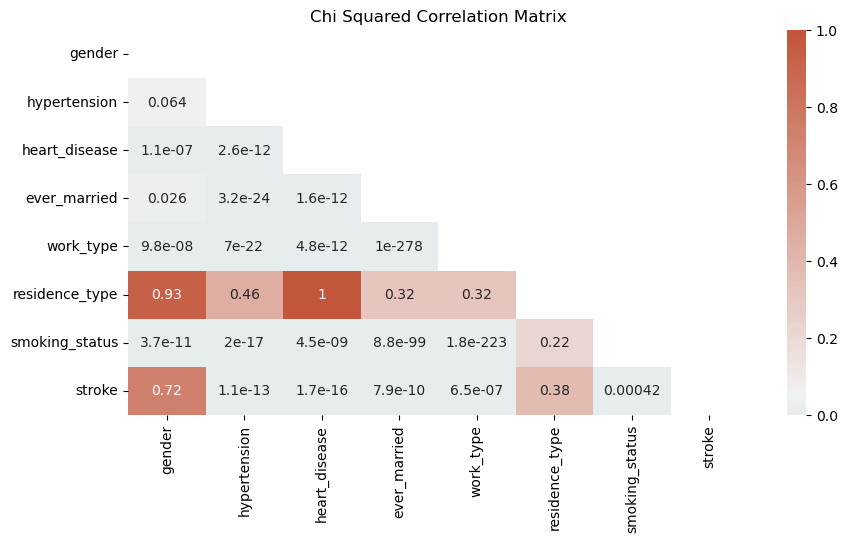

In [21]:
f.corr_heatmap(
    stroke,
    columns=[
        "gender",
        "hypertension",
        "heart_disease",
        "ever_married",
        "work_type",
        "residence_type",
        "smoking_status",
        "stroke",
    ],
    method="chi_squared",
    annot=True,
)

As we can see from the plot above the vast majority of the categorical features are correlated between each other because the p-values are smaller the 0.05.

--- 

Now after we have completed the exploratory data analysis step let's move on to the model development [ML classification model](./Classification.ipynb)